In [ ]:
pip install numpy matplotlib tensorflow scikit-learn


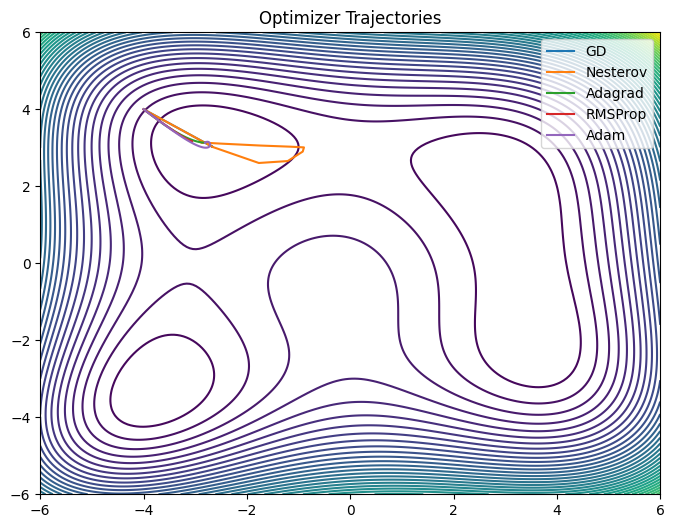

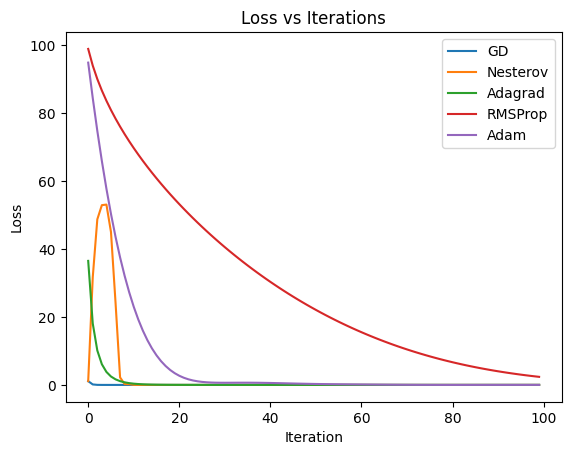

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Himmelblau Function
def loss_fn(w):
    w1, w2 = w
    return (w1**2 + w2 - 11)**2 + (w1 + w2**2 - 7)**2

def grad_fn(w):
    w1, w2 = w
    dw1 = 4*w1*(w1**2 + w2 - 11) + 2*(w1 + w2**2 - 7)
    dw2 = 2*(w1**2 + w2 - 11) + 4*w2*(w1 + w2**2 - 7)
    return np.array([dw1, dw2])

# Optimizers
def gradient_descent(init, lr=0.01, steps=100):
    w = init.copy()
    path = [w.copy()]
    loss = []
    for _ in range(steps):
        w -= lr * grad_fn(w)
        path.append(w.copy())
        loss.append(loss_fn(w))
    return np.array(path), loss

def nesterov(init, lr=0.01, gamma=0.9, steps=100):
    w = init.copy()
    v = np.zeros_like(w)
    path = [w.copy()]
    loss = []
    for _ in range(steps):
        lookahead = w - gamma*v
        g = grad_fn(lookahead)
        v = gamma*v + lr*g
        w -= v
        path.append(w.copy())
        loss.append(loss_fn(w))
    return np.array(path), loss

def adagrad(init, lr=0.4, steps=100):
    w = init.copy()
    G = np.zeros_like(w)
    eps = 1e-8
    path=[w.copy()]
    loss=[]
    for _ in range(steps):
        g = grad_fn(w)
        G += g**2
        w -= lr*g/(np.sqrt(G)+eps)
        path.append(w.copy())
        loss.append(loss_fn(w))
    return np.array(path), loss

def rmsprop(init, lr=0.01, beta=0.9, steps=100):
    w = init.copy()
    Eg = np.zeros_like(w)
    eps=1e-8
    path=[w.copy()]
    loss=[]
    for _ in range(steps):
        g=grad_fn(w)
        Eg = beta*Eg + (1-beta)*(g**2)
        w -= lr*g/(np.sqrt(Eg)+eps)
        path.append(w.copy())
        loss.append(loss_fn(w))
    return np.array(path), loss

def adam(init, lr=0.05, steps=100):
    w = init.copy()
    m = np.zeros_like(w)
    v = np.zeros_like(w)
    b1,b2=0.9,0.999
    eps=1e-8
    path=[w.copy()]
    loss=[]
    for t in range(1,steps+1):
        g=grad_fn(w)
        m=b1*m+(1-b1)*g
        v=b2*v+(1-b2)*(g**2)
        mhat=m/(1-b1**t)
        vhat=v/(1-b2**t)
        w-=lr*mhat/(np.sqrt(vhat)+eps)
        path.append(w.copy())
        loss.append(loss_fn(w))
    return np.array(path), loss

# Run optimizers
init = np.array([-4.0, 4.0])

paths = {}
losses = {}

for name, opt in {
    "GD": gradient_descent,
    "Nesterov": nesterov,
    "Adagrad": adagrad,
    "RMSProp": rmsprop,
    "Adam": adam
}.items():
    paths[name], losses[name] = opt(init)

# Create contour grid
x = np.linspace(-6,6,200)
y = np.linspace(-6,6,200)
X,Y = np.meshgrid(x,y)
Z = loss_fn([X,Y])

# Plot contour with trajectories
plt.figure(figsize=(8,6))
plt.contour(X,Y,Z,50)
for name,path in paths.items():
    plt.plot(path[:,0], path[:,1], label=name)
plt.legend()
plt.title("Optimizer Trajectories")
plt.show()

# Loss vs Iterations
plt.figure()
for name,l in losses.items():
    plt.plot(l,label=name)
plt.legend()
plt.title("Loss vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load MNIST
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# Select digits 0 and 1
mask = (y_train==0) | (y_train==1)
x = x_train[mask]
y = y_train[mask]

# Flatten images
x = x.reshape(len(x), -1)

# Reduce to 2 features using mean of halves
f1 = x[:, :392].mean(axis=1)
f2 = x[:, 392:].mean(axis=1)

X = np.vstack((f1,f2)).T

# normalize
X = StandardScaler().fit_transform(X)

y = y.astype(np.float32)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def loss(w,X,y):
    z = X.dot(w)
    p = sigmoid(z)
    return -np.mean(y*np.log(p+1e-8)+(1-y)*np.log(1-p+1e-8))

def grad(w,X,y):
    p = sigmoid(X.dot(w))
    return X.T.dot(p-y)/len(y)


In [ ]:
def train_adam(X,y,lr=0.05,steps=200):
    w=np.zeros(2)
    m=np.zeros(2)
    v=np.zeros(2)
    b1,b2=0.9,0.999
    losses=[]
    path=[w.copy()]

    for t in range(1,steps+1):
        g=grad(w,X,y)
        m=b1*m+(1-b1)*g
        v=b2*v+(1-b2)*(g**2)
        mhat=m/(1-b1**t)
        vhat=v/(1-b2**t)
        w-=lr*mhat/(np.sqrt(vhat)+1e-8)
        losses.append(loss(w,X,y))
        path.append(w.copy())
    return np.array(path),losses

path,losses=train_adam(X,y)

print("Final weights:",path[-1])


Final weights: [-2.48805623 -2.3603943 ]


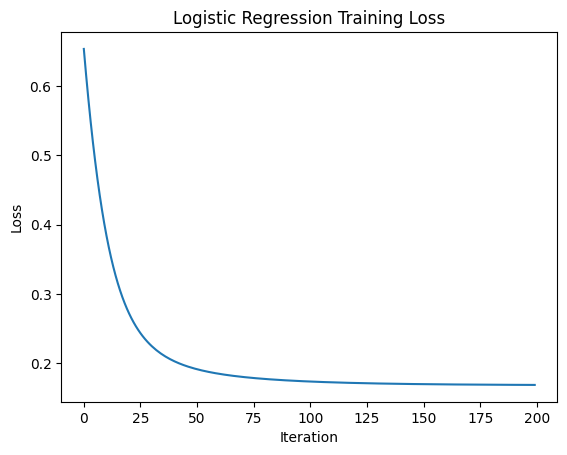

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Logistic Regression Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()


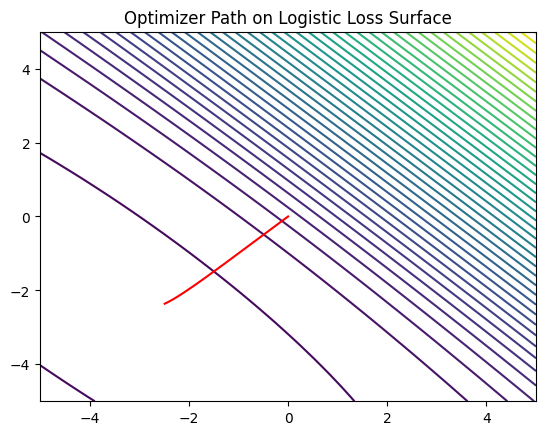

In [ ]:
w1 = np.linspace(-5,5,100)
w2 = np.linspace(-5,5,100)
W1,W2 = np.meshgrid(w1,w2)
Z = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        Z[i,j]=loss(np.array([W1[i,j],W2[i,j]]),X,y)

plt.contour(W1,W2,Z,50)
plt.plot(path[:,0],path[:,1],'r')
plt.title("Optimizer Path on Logistic Loss Surface")
plt.show()


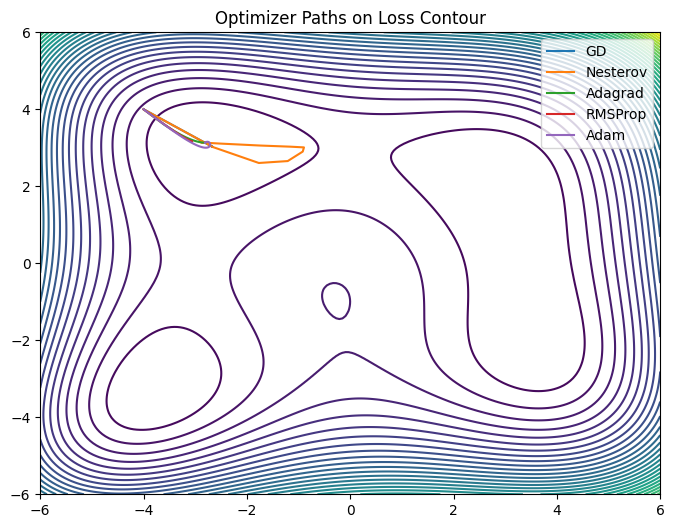

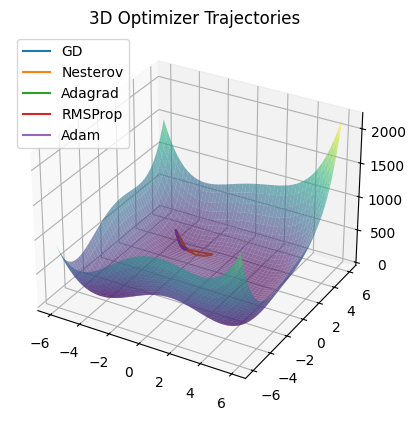

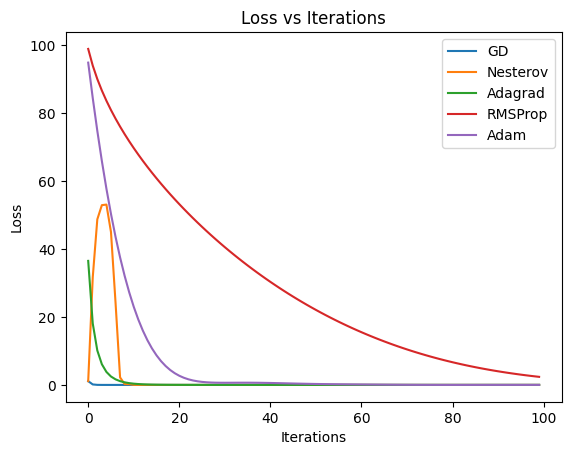

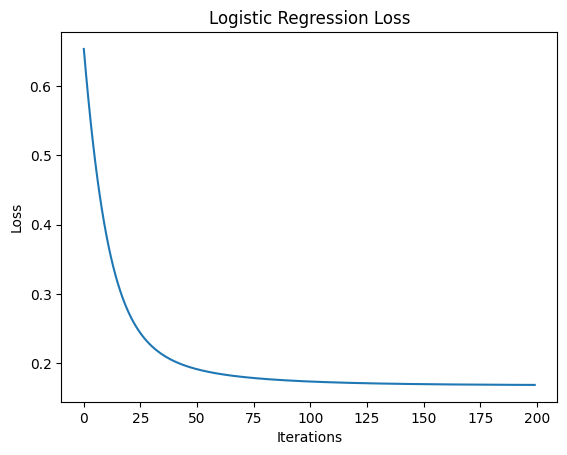

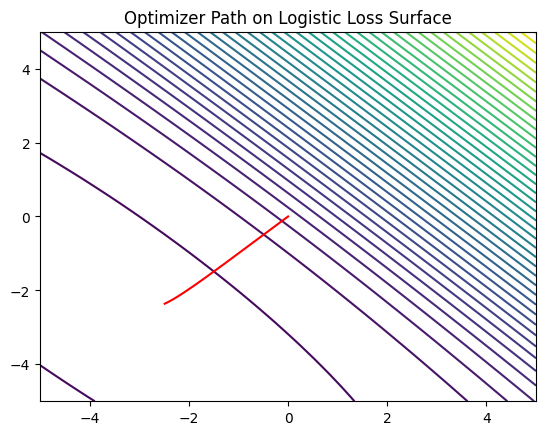

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
def J(w):
    w1, w2 = w
    return (w1**2 + w2 - 11)**2 + (w1 + w2**2 - 7)**2
def grad_J(w):
    w1, w2 = w
    dw1 = 4*w1*(w1**2 + w2 - 11) + 2*(w1 + w2**2 - 7)
    dw2 = 2*(w1**2 + w2 - 11) + 4*w2*(w1 + w2**2 - 7)
    return np.array([dw1, dw2])
def GD(init, lr=0.01, steps=100):
    w = init.copy()
    path=[w.copy()]
    loss=[]
    for _ in range(steps):
        w -= lr*grad_J(w)
        path.append(w.copy())
        loss.append(J(w))
    return np.array(path), loss
def Nesterov(init, lr=0.01, gamma=0.9, steps=100):
    w = init.copy()
    v = np.zeros_like(w)
    path=[w.copy()]
    loss=[]
    for _ in range(steps):
        lookahead = w - gamma*v
        g = grad_J(lookahead)
        v = gamma*v + lr*g
        w -= v
        path.append(w.copy())
        loss.append(J(w))
    return np.array(path), loss
def Adagrad(init, lr=0.4, steps=100):
    w = init.copy()
    G = np.zeros_like(w)
    eps=1e-8
    path=[w.copy()]
    loss=[]
    for _ in range(steps):
        g=grad_J(w)
        G += g**2
        w -= lr*g/(np.sqrt(G)+eps)
        path.append(w.copy())
        loss.append(J(w))
    return np.array(path), loss
def RMSProp(init, lr=0.01, beta=0.9, steps=100):
    w=init.copy()
    Eg=np.zeros_like(w)
    eps=1e-8
    path=[w.copy()]
    loss=[]
    for _ in range(steps):
        g=grad_J(w)
        Eg=beta*Eg+(1-beta)*(g**2)
        w -= lr*g/(np.sqrt(Eg)+eps)
        path.append(w.copy())
        loss.append(J(w))
    return np.array(path), loss
def Adam(init, lr=0.05, steps=100):
    w=init.copy()
    m=np.zeros_like(w)
    v=np.zeros_like(w)
    b1,b2=0.9,0.999
    eps=1e-8
    path=[w.copy()]
    loss=[]
    for t in range(1,steps+1):
        g=grad_J(w)
        m=b1*m+(1-b1)*g
        v=b2*v+(1-b2)*(g**2)
        mhat=m/(1-b1**t)
        vhat=v/(1-b2**t)
        w -= lr*mhat/(np.sqrt(vhat)+eps)
        path.append(w.copy())
        loss.append(J(w))
    return np.array(path), loss
init = np.array([-4.0, 4.0])
optimizers = {
    "GD": GD,
    "Nesterov": Nesterov,
    "Adagrad": Adagrad,
    "RMSProp": RMSProp,
    "Adam": Adam
}
paths={}
losses={}
for name,opt in optimizers.items():
    paths[name], losses[name] = opt(init)
x=np.linspace(-6,6,200)
y=np.linspace(-6,6,200)
X,Y=np.meshgrid(x,y)
Z=J([X,Y])
plt.figure(figsize=(8,6))
plt.contour(X,Y,Z,40)
for name,p in paths.items():
    plt.plot(p[:,0],p[:,1],label=name)
plt.legend()
plt.title("Optimizer Paths on Loss Contour")
plt.show()
#3D SURFACE
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,cmap=cm.viridis,alpha=0.6)

for name,p in paths.items():
    z=[J(w) for w in p]
    ax.plot(p[:,0],p[:,1],z,label=name)

ax.set_title("3D Optimizer Trajectories")
plt.legend()
plt.show()
#LOSS CURVES
plt.figure()
for name,l in losses.items():
    plt.plot(l,label=name)
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.show()
#Load MNIST
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
mask=(y_train==0)|(y_train==1)
x=x_train[mask]
y=y_train[mask]
x=x.reshape(len(x),-1)
f1=x[:,:392].mean(axis=1)
f2=x[:,392:].mean(axis=1)
X=np.vstack((f1,f2)).T
X=StandardScaler().fit_transform(X)
y=y.astype(np.float32)
def sigmoid(z):
    return 1/(1+np.exp(-z))
def loss_lr(w):
    p=sigmoid(X.dot(w))
    return -np.mean(y*np.log(p+1e-8)+(1-y)*np.log(1-p+1e-8))
def grad_lr(w):
    p=sigmoid(X.dot(w))
    return X.T.dot(p-y)/len(y)
def train_adam_lr(steps=200, lr=0.05):
    w=np.zeros(2)
    m=np.zeros(2)
    v=np.zeros(2)
    b1,b2=0.9,0.999
    eps=1e-8
    path=[w.copy()]
    losses=[]
    for t in range(1,steps+1):
        g=grad_lr(w)
        m=b1*m+(1-b1)*g
        v=b2*v+(1-b2)*(g**2)
        mhat=m/(1-b1**t)
        vhat=v/(1-b2**t)
        w -= lr*mhat/(np.sqrt(vhat)+eps)
        path.append(w.copy())
        losses.append(loss_lr(w))
    return np.array(path),losses
path_lr,loss_lr_vals=train_adam_lr()
#loss curve
plt.plot(loss_lr_vals)
plt.title("Logistic Regression Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()
w1=np.linspace(-5,5,100)
w2=np.linspace(-5,5,100)
W1,W2=np.meshgrid(w1,w2)
Z=np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        Z[i,j]=loss_lr(np.array([W1[i,j],W2[i,j]]))

plt.contour(W1,W2,Z,40)
plt.plot(path_lr[:,0],path_lr[:,1],'r')
plt.title("Optimizer Path on Logistic Loss Surface")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, cm
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import pandas as pd

###########################################################
# PART 1 — NON-CONVEX FUNCTION
###########################################################

def J(w):
    w1, w2 = w
    return (w1**2 + w2 - 11)**2 + (w1 + w2**2 - 7)**2

def grad_J(w):
    w1, w2 = w
    dw1 = 4*w1*(w1**2 + w2 - 11) + 2*(w1 + w2**2 - 7)
    dw2 = 2*(w1**2 + w2 - 11) + 4*w2*(w1 + w2**2 - 7)
    return np.array([dw1, dw2])

# ---------- OPTIMIZERS ----------

def GD(init, lr=0.01, steps=100):
    w=init.copy()
    path=[w.copy()]
    loss=[]
    for _ in range(steps):
        w -= lr*grad_J(w)
        path.append(w.copy())
        loss.append(J(w))
    return np.array(path), loss

def SGD(init, lr=0.01, steps=100):
    # stochastic noise added to simulate SGD behavior
    w=init.copy()
    path=[w.copy()]
    loss=[]
    for _ in range(steps):
        noise=np.random.randn(2)*0.1
        w -= lr*(grad_J(w)+noise)
        path.append(w.copy())
        loss.append(J(w))
    return np.array(path), loss

def MiniBatch(init, lr=0.01, steps=100):
    w=init.copy()
    path=[w.copy()]
    loss=[]
    for _ in range(steps):
        noise=np.random.randn(2)*0.05
        w -= lr*(grad_J(w)+noise)
        path.append(w.copy())
        loss.append(J(w))
    return np.array(path), loss

def Nesterov(init, lr=0.01, gamma=0.9, steps=100):
    w=init.copy()
    v=np.zeros_like(w)
    path=[w.copy()]
    loss=[]
    for _ in range(steps):
        look=w-gamma*v
        g=grad_J(look)
        v=gamma*v+lr*g
        w -= v
        path.append(w.copy())
        loss.append(J(w))
    return np.array(path), loss

def Adagrad(init, lr=0.4, steps=100):
    w=init.copy()
    G=np.zeros_like(w)
    path=[w.copy()]
    loss=[]
    for _ in range(steps):
        g=grad_J(w)
        G+=g**2
        w-=lr*g/(np.sqrt(G)+1e-8)
        path.append(w.copy())
        loss.append(J(w))
    return np.array(path), loss

def RMSProp(init, lr=0.01, steps=100):
    w=init.copy()
    Eg=np.zeros_like(w)
    path=[w.copy()]
    loss=[]
    for _ in range(steps):
        g=grad_J(w)
        Eg=0.9*Eg+0.1*(g**2)
        w-=lr*g/(np.sqrt(Eg)+1e-8)
        path.append(w.copy())
        loss.append(J(w))
    return np.array(path), loss

def Adam(init, lr=0.05, steps=100):
    w=init.copy()
    m=v=np.zeros_like(w)
    path=[w.copy()]
    loss=[]
    for t in range(1,steps+1):
        g=grad_J(w)
        m=0.9*m+0.1*g
        v=0.999*v+0.001*(g**2)
        mhat=m/(1-0.9**t)
        vhat=v/(1-0.999**t)
        w-=lr*mhat/(np.sqrt(vhat)+1e-8)
        path.append(w.copy())
        loss.append(J(w))
    return np.array(path), loss

init=np.array([-4.0,4.0])

optimizers={
    "GD":GD,
    "SGD":SGD,
    "MiniBatch":MiniBatch,
    "Nesterov":Nesterov,
    "Adagrad":Adagrad,
    "RMSProp":RMSProp,
    "Adam":Adam
}

paths={}
losses={}
for name,opt in optimizers.items():
    paths[name],losses[name]=opt(init)

# ---------- ANIMATED CONTOUR ----------
x=np.linspace(-6,6,200)
y=np.linspace(-6,6,200)
X,Y=np.meshgrid(x,y)
Z=J([X,Y])

fig,ax=plt.subplots()
ax.contour(X,Y,Z,40)

lines={name:ax.plot([],[],label=name)[0] for name in paths}
ax.legend()

def animate(i):
    for name,line in lines.items():
        p=paths[name]
        if i < len(p):
            line.set_data(p[:i,0],p[:i,1])
    return lines.values()

ani=animation.FuncAnimation(fig,animate,frames=100,interval=100)
ani.save("optimizer_paths.gif",writer="pillow")
plt.close()

# ---------- 3D SURFACE ANIMATION ----------
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,cmap=cm.viridis,alpha=0.6)

def animate3d(i):
    ax.clear()
    ax.plot_surface(X,Y,Z,cmap=cm.viridis,alpha=0.6)
    for name,p in paths.items():
        if i<len(p):
            z=[J(w) for w in p[:i]]
            ax.plot(p[:i,0],p[:i,1],z)
    return ax

ani3d=animation.FuncAnimation(fig,animate3d,frames=100)
ani3d.save("optimizer_3d.gif",writer="pillow")
plt.close()

# ---------- LOSS CURVES ----------
plt.figure()
for name,l in losses.items():
    plt.plot(l,label=name)
plt.legend()
plt.title("Loss Comparison")
plt.savefig("loss_plot.png")
plt.close()

###########################################################
# PART 2 — MNIST DATASET (REPLACES POSE DATA)
###########################################################

(x_train,y_train),_=tf.keras.datasets.mnist.load_data()

mask=(y_train==0)|(y_train==1)
x=x_train[mask]
y=y_train[mask]

x=x.reshape(len(x),-1)

f1=x[:,:392].mean(axis=1)
f2=x[:,392:].mean(axis=1)

X=np.vstack((f1,f2)).T
X=StandardScaler().fit_transform(X)

# save dataset CSV (required for submission)
dataset=pd.DataFrame({"feature1":X[:,0],"feature2":X[:,1],"label":y})
dataset.to_csv("mnist_pose_like_dataset.csv",index=False)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def loss_lr(w):
    p=sigmoid(X.dot(w))
    return -np.mean(y*np.log(p+1e-8)+(1-y)*np.log(1-p+1e-8))

def grad_lr(w):
    p=sigmoid(X.dot(w))
    return X.T.dot(p-y)/len(y)

def train_optimizer(opt_name, steps=200, lr=0.05):
    w=np.zeros(2)
    path=[w.copy()]
    losses=[]
    for _ in range(steps):
        g=grad_lr(w)
        w -= lr*g
        path.append(w.copy())
        losses.append(loss_lr(w))
    return np.array(path),losses

path_lr,loss_lr_vals=train_optimizer("GD")

plt.plot(loss_lr_vals)
plt.title("Logistic Regression Loss")
plt.savefig("logistic_loss.png")
plt.close()
